In [ ]:
# Sort by score
# modelnames = {'':['p'],
#               '_manual':['p'],
#               '_pathway_combine':['p'],
#               '_coswap1':['c',"YJL052W","YJR009C","YGR192C"],
#               '_noNAD/NADPH_cycling':["k","YOR120W"]}
    
    # names.append()
for i, values in enumerate(model_score.values()):
    print("| Model",str(i+1),"|","","|",number_of_modifications[i],"|"," | ".join([str(round(x,4)) for x in values]),"|",str(round(combined[i][6]*100,1))+"%","|")

In [ ]:
# modelnames = {'':['p'],
#               '_manual':['p'],
#               '_pathway_combine':['p'],
#               '_coswap1':['c',"YJL052W","YJR009C","YGR192C"],
#               '_noNAD/NADPH_cycling':["k","YOR120W"]}
    
    # names.append()
for i, values in enumerate(model_score.values()):
    print("| Model",str(i+1),"|","","|"," | ".join([str(round(x,4)) for x in values]),"|")

In [1]:
# Load libraries
import numpy as np
from cobra.io import read_sbml_model, write_sbml_model
from cobra.util import create_stoichiometric_matrix
from cobra import Reaction, Metabolite
from cobra.core.gene import GPR

In [2]:
# Loading model
infilename = '../../models/iMM904_progesterone.xml'
print(f"Loading {infilename}")
model = read_sbml_model(infilename)

Loading ../../models/iMM904_progesterone.xml


In [10]:
model.optimize()
model.genes.YML008C


Gene identifier,YML008C
Name,ERG6
Memory address,0x07f24d4b185b0
Functional,True
In 1 reaction(s),SAM24MT


In [11]:
model.reactions.SAM24MT.flux

0.0

In [13]:
model.genes.EBP

Gene identifier,EBP
Name,G_EBP
Memory address,0x07f24d4ab7ee0
Functional,True
In 1 reaction(s),CHLSTI


In [15]:
model.reactions.CHLSTI.flux

0.00020150599259281178

In [ ]:
["YMR015C","YML008C"]

In [15]:
# Stats of upregulated genes
up_reacs = ["G3PD1ir", "DHAK", "G3PT", "GLYCDy"]
for reac in up_reacs:
    print(model.reactions.get_by_id(reac))

G3PD1ir: dhap_c + h_c + nadh_c --> glyc3p_c + nad_c
DHAK: atp_c + dha_c --> adp_c + dhap_c + h_c
G3PT: glyc3p_c + h2o_c --> glyc_c + pi_c
GLYCDy: glyc_c + nadp_c --> dha_c + h_c + nadph_c


In [6]:
import matplotlib.pyplot as plt


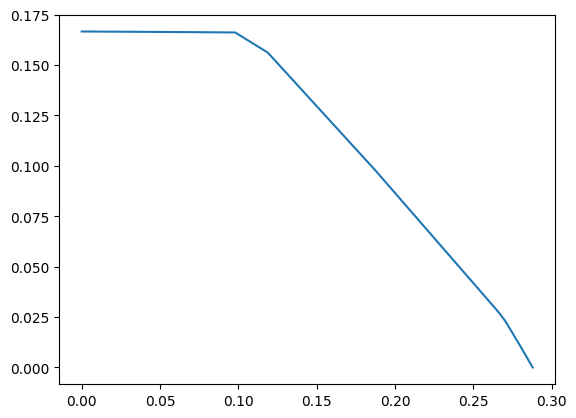

In [11]:
with model as m:
    m.optimize()
    max_bio = m.reactions.BIOMASS_SC5_notrace.flux
    m.objective = m.reactions.DM_progesterone_c
    m.optimize()
    max_prog = m.reactions.DM_progesterone_c.flux
    m.objective = m.reactions.BIOMASS_SC5_notrace
    len = 1000
    pp = []
    biomass = []
    for i in range(len):
        pp.append((i/(len-1))*max_prog)
        m.reactions.DM_progesterone_c.lower_bound = pp[i]
        biomass.append(m.optimize().objective_value)
plt.plot(biomass,pp)
plt.show()

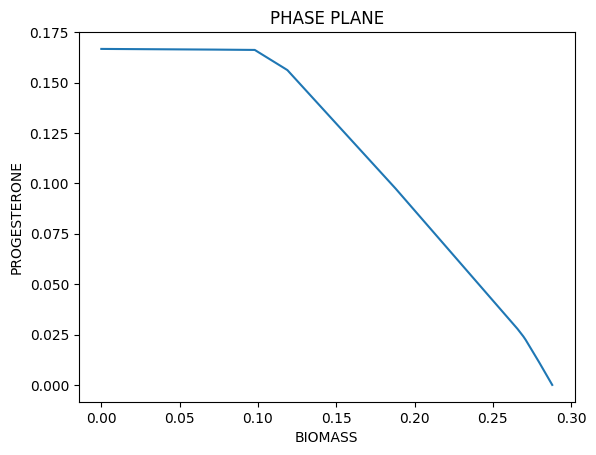

In [33]:
up_reacs = ["baseline"]
for reac in up_reacs:
    with model as m:
        if reac != "baseline":
            m.reactions.get_by_id(reac).lower_bound = 4
        m.optimize()
        max_bio = m.reactions.BIOMASS_SC5_notrace.flux
        m.objective = m.reactions.DM_progesterone_c
        m.optimize()
        max_prog = m.reactions.DM_progesterone_c.flux
        m.objective = m.reactions.BIOMASS_SC5_notrace
        len = 1000
        pp = []
        biomass = []
        for i in range(len):
            pp.append((i/(len-1))*max_prog)
            m.reactions.DM_progesterone_c.lower_bound = pp[i]
            biomass.append(m.optimize().objective_value)
    plt.plot(biomass,pp,label=reac)
    plt.xlabel("BIOMASS")
    plt.ylabel("PROGESTERONE")
    plt.title("PHASE PLANE")
plt.show()

In [4]:
for met in model.metabolites.zymst_c.reactions:
    print(mot)

R07498: h_c + nadph_c + zymst_c <=> cholesta8en3betaol_c + nadp_c
CHLSTI: amet_c + o2_c + zymst_c --> ahcys_c + ergtetrol_c + 2.0 h2o_c + h_c
ZYMSTESTH_SC: h2o_c + 0.01 zymstest_SC_c --> h_c + 0.02 hdca_c + 0.655 hdcea_c + 0.01 hexc_c + 0.03 ocdca_c + 0.27 ocdcea_c + 0.015 ttdca_c + 0.01 zymst_c
ZYMSTAT_SC: 0.655 hdcoa_c + 0.01 hexccoa_c + 0.27 odecoa_c + 0.02 pmtcoa_c + 0.03 stcoa_c + 0.015 tdcoa_c + 0.01 zymst_c --> coa_c + 0.01 zymstest_SC_c
BIOMASS_SC5_notrace: 1.1348 13BDglcn_c + 0.4588 ala__L_c + 0.046 amp_c + 0.1607 arg__L_c + 0.1017 asn__L_c + 0.2975 asp__L_c + 59.276 atp_c + 0.0447 cmp_c + 0.0066 cys__L_c + 0.0036 damp_c + 0.0024 dcmp_c + 0.0024 dgmp_c + 0.0036 dtmp_c + 0.0007 ergst_c + 0.1054 gln__L_c + 0.3018 glu__L_c + 0.2904 gly_c + 0.5185 glycogen_c + 0.046 gmp_c + 59.276 h2o_c + 0.0663 his__L_c + 0.1927 ile__L_c + 0.2964 leu__L_c + 0.2862 lys__L_c + 0.8079 mannan_c + 0.0507 met__L_c + 6e-06 pa_SC_c + 6e-05 pc_SC_c + 4.5e-05 pe_SC_c + 0.1339 phe__L_c + 0.1647 pro__L_c + 1

In [7]:
up_reacs = ["G3PD1ir","G3PT", "GLYCDy", "DHAK"]
for reac in up_reacs:
    print(model.reactions.get_by_id(reac))

G3PD1ir: dhap_c + h_c + nadh_c --> glyc3p_c + nad_c
G3PT: glyc3p_c + h2o_c --> glyc_c + pi_c
GLYCDy: glyc_c + nadp_c --> dha_c + h_c + nadph_c
DHAK: atp_c + dha_c --> adp_c + dhap_c + h_c


In [62]:
up_reacs = ["baseline","G3PD1ir", "DHAK", "G3PT", "GLYCDy"]
ZYMST = []
Bio = []
r = []
prog= []
with model as m:
    for reac in up_reacs:
        if reac != "baseline":
            m.reactions.get_by_id(reac).upper_bound = 1
            m.reactions.get_by_id(reac).lower_bound = 1
    for reac in up_reacs:
        if reac != "baseline":
            m.reactions.get_by_id(reac).upper_bound = 6
            m.reactions.get_by_id(reac).lower_bound = 4
            
        # m.reactions.ZYMSTt.lower_bound = 0
        # m.reactions.SAM24MT.upper_bound = 0
        # m.reactions.CHLSTI.upper_bound = 0
        m.objective = {m.reactions.get_by_id('BIOMASS_SC5_notrace'): max_prog, 
        m.reactions.get_by_id('DM_progesterone_c'): max_bio}
        # m.objective = m.reactions.C3STKR2
        # m.objective = m.reactions.DM_progesterone_c
        m.optimize()
        biobio = m.reactions.BIOMASS_SC5_notrace.flux
        progprog = m.reactions.DM_progesterone_c.flux
        
        if reac != "baseline":
            pass
            print(reac,"flux:",m.reactions.get_by_id(reac).flux,"| µ % change:",((biobio/Bio[0])-1)*100,"| prog % change:",((progprog/prog[0])-1)*100)
        else:
            for re in up_reacs:
                try:
                    print(re,"flux:",m.reactions.get_by_id(re).flux)
                except:
                    pass
        #     for k in m.metabolites.zymst_c.reactions:
        #         print(f"{k.id} | {k.flux} | {k.reaction}")
        prog.append(m.reactions.DM_progesterone_c.flux)
        ZYMST.append(m.reactions.C3STKR2.flux)
        Bio.append(m.reactions.BIOMASS_SC5_notrace.flux)
        r.append(m.reactions.BIOMASS_SC5_notrace.flux/m.reactions.C3STKR2.flux*0.00015)
print("bio",Bio)
print("zymst",ZYMST)
print("ratio",r)
print("progprog",prog)
print(Bio)
print(ZYMST)
print(r)
print(prog)

G3PD1ir flux: 1.0
DHAK flux: 1.0
G3PT flux: 1.0
GLYCDy flux: 1.0
G3PD1ir flux: 6.0 | µ % change: 0.03230973272132509 | prog % change: -0.00040242589711692034
DHAK flux: 4.0 | µ % change: -100.0 | prog % change: 1.2455253052547466
G3PT flux: 4.0 | µ % change: -100.0 | prog % change: 1.2455253052547466
GLYCDy flux: 4.0 | µ % change: 4.902691019817329 | prog % change: -0.06106425729026643
bio [0.1136586016309101, 0.11369532442131183, 0.0, 0.0, 0.11923093168631868]
zymst [0.156202360263821, 0.1562018134614719, 0.15789473684210525, 0.15789473684210525, 0.15611938826929597]
ratio [0.0001091455354185534, 0.00010918118224922732, 0.0, 0.0, 0.0001145574547223945]
progprog [0.155952311340233, 0.155951683747745, 0.15789473684210525, 0.15789473684210525, 0.15585708021958608]
[0.1136586016309101, 0.11369532442131183, 0.0, 0.0, 0.11923093168631868]
[0.156202360263821, 0.1562018134614719, 0.15789473684210525, 0.15789473684210525, 0.15611938826929597]
[0.0001091455354185534, 0.00010918118224922732, 0.0

/home/rune/miniconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/rune/miniconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/home/rune/miniconda3/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


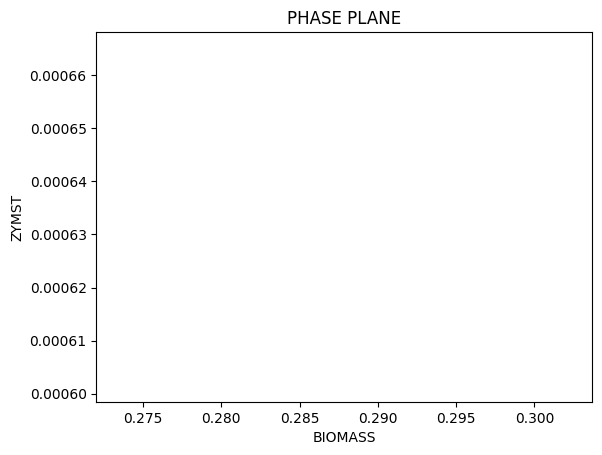

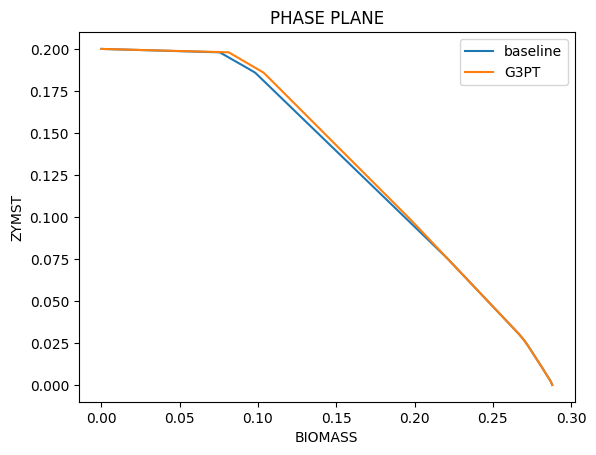

In [75]:
up_reacs = ["baseline", "G3PT"]

with model as m:
    for reac in up_reacs:
        if reac != "baseline":
            m.reactions.get_by_id(reac).upper_bound = 1
            m.reactions.get_by_id(reac).lower_bound = 0
    m.optimize()
    plt.plot(m.reactions.BIOMASS_SC5_notrace.flux,m.reactions.C3STKR2.flux)
    plt.xlabel("BIOMASS")
    plt.ylabel("ZYMST")
    plt.title("PHASE PLANE")
    plt.show()
    for reac in up_reacs:
        if reac != "baseline":
            m.reactions.get_by_id(reac).upper_bound = 6
            m.reactions.get_by_id(reac).lower_bound = 0
        m.optimize()
        max_bio = m.reactions.BIOMASS_SC5_notrace.flux
        m.objective = m.reactions.C3STKR2
        m.optimize()
        max_prog = m.reactions.C3STKR2.flux
        m.objective = m.reactions.BIOMASS_SC5_notrace
        len = 100
        pp = []
        biomass = []
        for i in range(len):
            pp.append((i/(len-1))*max_prog)
            m.reactions.C3STKR2.lower_bound = pp[i]
            biomass.append(m.optimize().objective_value)
        plt.plot(biomass,pp,label=reac)
plt.legend(up_reacs)
plt.xlabel("BIOMASS")
plt.ylabel("ZYMST")
plt.title("PHASE PLANE")
plt.show()

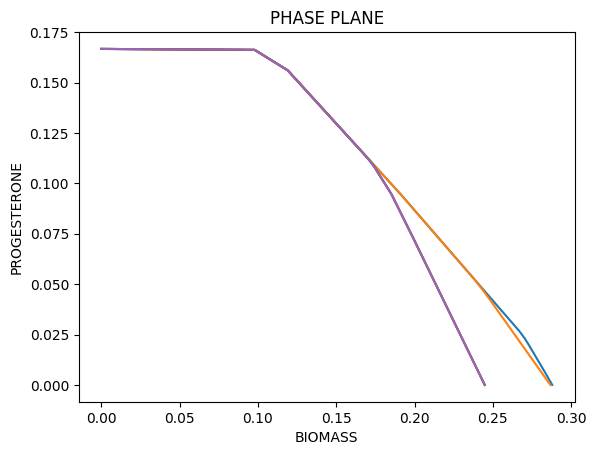

In [36]:
up_reacs = ["baseline","G3PD1ir", "DHAK", "G3PT", "GLYCDy"]
for reac in up_reacs:
    with model as m:
        if reac != "baseline":
            m.reactions.get_by_id(reac).lower_bound = 4
        m.optimize()
        max_bio = m.reactions.BIOMASS_SC5_notrace.flux
        m.objective = m.reactions.DM_progesterone_c
        m.optimize()
        max_prog = m.reactions.DM_progesterone_c.flux
        # m.objective = m.reactions.BIOMASS_SC5_notrace
        len = 1000
        pp = []
        biomass = []
        for i in range(len):
            biomass.append((i/(len-1))*max_bio)
            m.reactions.BIOMASS_SC5_notrace.lower_bound = biomass[i]
            pp.append(m.optimize().objective_value)
    plt.plot(biomass,pp,label=reac)
    plt.xlabel("BIOMASS")
    plt.ylabel("PROGESTERONE")
    plt.title("PHASE PLANE")
plt.show()

In [ ]:


pf = []
biomass = []
for i in range(10):
    with model:
        r = Reaction("test"+str(i))
        model.add_reactions([r])
        r.name = "test"+str(i)
        pf.append((i/9)*p_max)
        r.lower_bound = (i/9)*p_max
        r.upper_bound = 1000
        # r.gpr = GPR.from_string("test"+str(i))
        r.add_metabolites({"pregnenolone_c":-1,
                            "nad_c":-1,
                            "progesterone_c":1,
                            "nadh_c":1,
                            "h_c":1})
        # model.add_reactions([r])
        print(f'Adding reaction {r}')
        biomass.append(model.optimize().objective_value)

plt.plot(biomass,pf)
plt.show()

In [ ]:
for reac in up_reacs:
    model.reactions.get_by_id(reac).lowerbound = 4
    plotter = PlotlyPlotter()
    production_envelope = phenotypic_phase_plane(model,
                                                variables=[model.reactions.BIOMASS_SC5_notrace],
                                                objective=model.metabolites.progesterone_c, 
                                                points=10)
    production_envelope.plot(plotter, height=400)

In [12]:
with model:
    baseline_max_growth = model.optimize().objective_value
    model.objective = model.reactions.DM_progesterone_c
    baseline_max_production = model.optimize().objective_value


with model as md:
    md.objective = {model.reactions.get_by_id('BIOMASS_SC5_notrace'): baseline_max_production, 
                    model.reactions.get_by_id('DM_progesterone_c'): baseline_max_growth}
    before = md.optimize().fluxes
    print(md.reactions.EX_glc__D_e.flux)
    print(before["BIOMASS_SC5_notrace"])
    print(before["DM_progesterone_c"])

for reac in up_reacs:
    with model as md:
        
        md.objective = {model.reactions.get_by_id('BIOMASS_SC5_notrace'): baseline_max_production, 
                        model.reactions.get_by_id('DM_progesterone_c'): baseline_max_growth}
        after = md.optimize().fluxes
        print(reac,md.reactions.get_by_id(reac).flux)
        md.reactions.get_by_id(reac).lowerbound = 10
        after = md.optimize().fluxes
        print(reac,md.reactions.get_by_id(reac).flux,"Efter")
        print(md.reactions.get_by_id(reac).lowerbound)
        print(md.reactions.EX_glc__D_e.flux)
        print(after["BIOMASS_SC5_notrace"])
        print(after["DM_progesterone_c"])

-10.0
0.11872292252086715
0.1562004774234009
G3PD1ir 5.768846954408579
G3PD1ir 5.768846954408579 Efter
10
-10.0
0.11872292252086715
0.1562004774234009
DHAK 4.105905367241031
DHAK 4.105905367241031 Efter
10
-10.0
0.11872292252086715
0.1562004774234009
G3PT 4.105905367241031
G3PT 4.105905367241031 Efter
10
-10.0
0.11872292252086715
0.1562004774234009
GLYCDy 4.105905367241031
GLYCDy 4.105905367241031 Efter
10
-10.0
0.11872292252086715
0.1562004774234009


In [4]:
print(model.objective.expression)

1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090


In [114]:
# Add demand reaction for progesterone


In [115]:
# r = Reaction("R02216")
# r = lower_bound = 0.12698412
# model.add_reactions([r])
# progesterone_c,C21H30O2,progesterone,c


m = Metabolite("progesterone_e",formula="C21H30O2",name="EXprogesterone",compartment="e")


r = Reaction("T_progesterone")
model.add_reactions([r])
r.name = "T_progesterone"
r.lower_bound = 0.12698412
r.upper_bound = 1000
r.add_metabolites({"progesterone_c":-1,
                    m:1})
print(f'Adding reaction {r}')

model.add_boundary(model.metabolites.get_by_id('progesterone_e'), type='exchange')
# print(f'Model {model.id}: Adding reaction {model.reactions.DM_progesterone_e.name}: {model.reactions.DM_progesterone_e.reaction}')


Adding reaction T_progesterone: progesterone_c --> progesterone_e


Reaction identifier,EX_progesterone_e
Name,EXprogesterone exchange
Memory address,0x07ff63ec1b940
Stoichiometry,progesterone_e <=> EXprogesterone <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [116]:
fluxes = model.optimize()
test = fluxes.to_frame()
for key, value in zip(test.index,test.fluxes):
    print(key,"\t",value)

CITtcp 	 0.0
13BGH 	 0.0
13BGHe 	 0.0
13GS 	 0.16031085484323798
16GS 	 0.0
23CAPPD 	 0.0
2DDA7Ptm 	 0.0
2DHPtm 	 0.0
2DOXG6PP 	 0.0
2HBO 	 0.0
2HBt2 	 0.0
2HMHMBQMTm 	 0.0
2HP6MPMOm 	 0.0
2HPMBQMTm 	 0.0
2HPMMBQMOm 	 0.0
2MBACt 	 0.0
EX_epistest_SC_e 	 0.0
EX_epist_e 	 0.0
2MBALDt 	 0.0
2MBALDtm 	 0.0
2MBTOHt 	 0.0
ACACT6p 	 0.0
2MBTOHtm 	 0.0
ACACT7p 	 0.0
2MPPALt 	 0.0
ACACT8p 	 0.0
ACACT9p 	 0.0
ACALDCD 	 0.0
ACALDt 	 0.0
ACALDtm 	 -1.748681154705673
ACCOAC 	 0.05616813172864948
ACCOACrm 	 0.0
AGAT_SC 	 0.0034893180424991
AGPRim 	 0.02270175746678564
AGTi 	 0.0
AHCYStm 	 0.0
ACCOAtn 	 0.0
2MPPALtm 	 0.0
ACESt 	 0.0
ACGAM6PS 	 0.0
AHCi 	 0.0026417104208393987
AHMMPS 	 0.0
AHSERL 	 0.0
AHSERL2 	 0.00809465278685014
ACGAMPM 	 0.0
ACGKm 	 0.02270175746678564
2OBUTtm 	 0.02722233144897071
ACGSm 	 0.0
2OXOADPtim 	 0.04043088355316771
ACHBSm 	 0.02722233144897071
ACHLE1 	 0.0
2PHETOHt 	 0.0
ACHLE2 	 0.0
ACHLE3 	 0.0
ACLSm 	 0.07925131262518197
2PHETOHtm 	 0.0
ACOAHim 	 0.0
34HPLFM 	 0.0
A

In [80]:
with model:
    objective_reaction = model.reactions.R02216
    model.objective = objective_reaction
    p_max = model.optimize().objective_value
print(p_max)

0.1428571428571429


In [81]:
# Knock out of HSD3B gene
KOs = ["HSD3B"]
print(f"For model {model.id}:")
for KO in KOs:
    model.genes.get_by_id(KO).knock_out()
    print(f"{KO} were knocked out")

For model iMM904_progesterone:
HSD3B were knocked out


In [82]:
model.metabolites.pregnenolone_c

Metabolite identifier,pregnenolone_c
Name,pregnenolone
Memory address,0x07ff646b1e070
Formula,C21H32O2
Compartment,c
In 2 reaction(s),"ECYP11A1, R02216"


In [ ]:
model.reactions.R02216

In [92]:
Reaction("R02216").lower_bound = 0.12698412


In [86]:
pf = []
biomass = []
for i in range(10):
    with model:
        r = Reaction("test"+str(i))
        model.add_reactions([r])
        r.name = "test"+str(i)
        pf.append((i/9)*p_max)
        r.lower_bound = (i/9)*p_max
        r.upper_bound = 1000
        # r.gpr = GPR.from_string("test"+str(i))
        r.add_metabolites({"pregnenolone_c":-1,
                            "nad_c":-1,
                            "progesterone_c":1,
                            "nadh_c":1,
                            "h_c":1})
        # model.add_reactions([r])
        print(f'Adding reaction {r}')
        biomass.append(model.optimize().objective_value)


# with open("data/reactions.csv","r") as infile:
#     infile.readline()
#     for line in infile:
#         line = line.rstrip().split(",")
#         r = Reaction(line[0])
#         r.name = line[2]
#         if line[3] != "":
#             r.subsystem = line[3]
#         r.lower_bound = float(line[4])
#         r.upper_bound = float(line[5])
#         if line[1] != "":
#             r.gpr = GPR.from_string(line[1])
#         for i in range(int(len(line[6:])/2)):
#             metaboliteID = line[6+i*2]
#             if metaboliteID != "":
#                 if metaboliteID in model.metabolites:
#                     metaboliteID = model.metabolites.get_by_id(metaboliteID)
#                 else:
#                     metaboliteID = new_metabolites[metaboliteID]
#                 bin = float(line[7+i*2])
#                 r.add_metabolites({metaboliteID:bin})
#         print(f'Adding reaction {r} | enzyme {r.gpr}')
#         model.add_reactions([r])

Adding reaction test0: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test1: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test2: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test3: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test4: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test5: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test6: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test7: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test8: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c
Adding reaction test9: nad_c + pregnenolone_c --> h_c + nadh_c + progesterone_c


In [87]:
for b,p in zip(biomass,pf):
    print(f"biomass: {b}\tPf: {p}")

biomass: 0.287865703704016	Pf: 0.0
biomass: 0.27478105140368125	Pf: 0.01587301587301588
biomass: 0.25824287183833006	Pf: 0.03174603174603176
biomass: 0.2389924119233398	Pf: 0.04761904761904763
biomass: 0.2197419520083489	Pf: 0.06349206349206352
biomass: 0.2004914920933585	Pf: 0.07936507936507939
biomass: 0.18124103217836826	Pf: 0.09523809523809526
biomass: 0.1613867604101909	Pf: 0.11111111111111115
biomass: 0.14126792809099536	Pf: 0.12698412698412703
biomass: 0.0	Pf: 0.1428571428571429


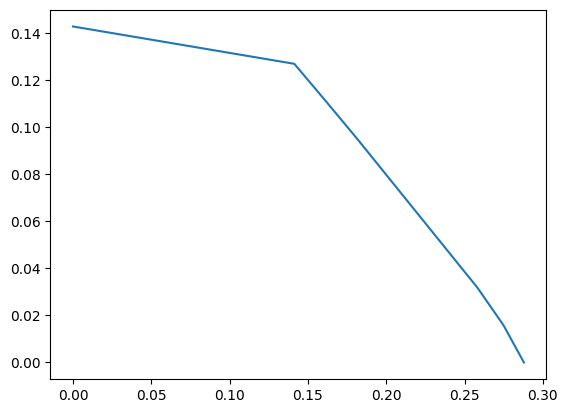

In [91]:
import matplotlib.pyplot as plt

plt.plot(biomass,pf)
plt.show()

In [63]:
# Knock out of CYP11A1 gene
KOs = ["DHCR24"]
model_pathway1 = model.copy()
model_pathway1.id = "iMM904_progesterone_pathway1"
print(f"Model {model_pathway1.id} were made as a copy of {model.id}")
print(f"For model {model_pathway1.id}:")
for KO in KOs:
    model_pathway1.genes.get_by_id(KO).knock_out()
    print(f"{KO} were knocked out")

Model iMM904_progesterone_pathway1 were made as a copy of iMM904_progesterone
For model iMM904_progesterone_pathway1:
DHCR24 were knocked out


In [64]:
model_pathway1.genes.DHCR24

Gene identifier,DHCR24
Name,G_DHCR24
Memory address,0x07ff6470e34f0
Functional,False
In 2 reaction(s),"R07498, R05703"


In [65]:
# Add all new metabolites from metabolites_new.csv
new_metabolites = dict()
with open("../../data/metabolites_new.csv","r") as infile:
    infile.readline()
    for line in infile:
        line = line.rstrip().split(",")
        m = Metabolite(
            line[0],
            formula=line[1],
            name=line[2],
            compartment=line[3])
        print(f'Adding metabolite {m.name} (id: {m})')
        new_metabolites[line[0]] = m

Adding metabolite 7-dehydrodesmosterol (id: dehydrodesmosterol_c)
Adding metabolite desmosterol (id: desmosterol_c)


In [66]:
# Add reactionas for pathway 2, 3, and combined
models = {model_pathway1:['MNXR3338','MNXR11345']}
for m, import_reactions in models.items():
    print(f"For model {m.id}:")
    with open("../../data/reactions_new.csv","r") as infile:
        infile.readline()
        for line in infile:
            line = line.rstrip().split(",")
            r = Reaction(line[0])
            if line[0] in import_reactions:
                r.name = line[2]
                if line[3] != "":
                    r.subsystem = line[3]
                r.lower_bound = float(line[4])
                r.upper_bound = float(line[5])
                if line[1] != "":
                    r.gpr = GPR.from_string(line[1])
                for i in range(int(len(line[6:])/2)):
                    metaboliteID = line[6+i*2]
                    if metaboliteID != "":
                        if metaboliteID in m.metabolites:
                            metaboliteID = m.metabolites.get_by_id(metaboliteID)
                        else:
                            metaboliteID = new_metabolites[metaboliteID]
                        bin = float(line[7+i*2])
                        r.add_metabolites({metaboliteID:bin})
                print(f'Adding reaction {r} | enzyme {r.gpr}')
                m.add_reactions([r])

For model iMM904_progesterone_pathway1:
Adding reaction MNXR11345: dehydrodesmosterol_c + h_c + nadph_c <=> dehydrocholesterol_c + nadp_c | enzyme MNXR11345
Adding reaction MNXR3338: cholesta724dien3betaol_c + h_c + nadph_c + o2_c --> dehydrodesmosterol_c + 2.0 h2o_c + nadp_c | enzyme MNXR3338


In [67]:
model_pathway1.genes.DHCR24

Gene identifier,DHCR24
Name,G_DHCR24
Memory address,0x07ff6470e34f0
Functional,False
In 2 reaction(s),"R07498, R05703"


In [31]:
# Add demand reaction for progesterone
model.add_boundary(model.metabolites.get_by_id('progesterone_c'), type='demand')
print(f'Model {model.id}: Adding reaction {model.reactions.DM_progesterone_c.name}: {model.reactions.DM_progesterone_c.reaction}')

Model iMM904_progesterone_pathway2: Adding reaction progesterone demand: progesterone_c --> 


In [41]:
model.genes.CYP11A1

Gene identifier,CYP11A1
Name,G_CYP11A1
Memory address,0x07ff651b7fb50
Functional,True
In 1 reaction(s),ECYP11A1


In [32]:
fluxes = model.optimize()
test = fluxes.to_frame()
for key, value in zip(test.index,test.fluxes):
    print(key,"\t",value)

In [33]:
fluxes

,fluxes,reduced_costs
CITtcp,0.00000,-0.000000
13BGH,0.00000,-0.047516
13BGHe,0.00000,0.000000
13GS,0.32667,0.000000
16GS,0.00000,0.000000
...,...,...
SK_methylpentanal_c,0.00000,0.000000
MNXR4011,0.00000,-0.000000
MNXR11345,0.00000,-0.000000
MNXR3338,0.00000,0.000000


In [34]:
test = fluxes.to_frame()
for key, value in zip(test.index,test.fluxes):
    print(key,"\t",value)

In [35]:
test

,fluxes,reduced_costs
CITtcp,0.00000,-0.000000
13BGH,0.00000,-0.047516
13BGHe,0.00000,0.000000
13GS,0.32667,0.000000
16GS,0.00000,0.000000
...,...,...
SK_methylpentanal_c,0.00000,0.000000
MNXR4011,0.00000,-0.000000
MNXR11345,0.00000,-0.000000
MNXR3338,0.00000,0.000000


In [36]:
model.metabolites.epist_c  

Metabolite identifier,epist_c
Name,Episterol C28H46O
Memory address,0x07ff651d25910
Formula,C28H46O
Compartment,c
In 5 reaction(s),"EPISTt, EPISTESTH_SC, EPISTAT_SC, C8STI, C5STDS"


In [37]:
for reac in model.metabolites.epist_c.reactions:
    print(reac)

EPISTt: epist_e <=> epist_c
EPISTESTH_SC: 0.01 epistest_SC_c + h2o_c --> 0.01 epist_c + h_c + 0.02 hdca_c + 0.655 hdcea_c + 0.01 hexc_c + 0.03 ocdca_c + 0.27 ocdcea_c + 0.015 ttdca_c
EPISTAT_SC: 0.01 epist_c + 0.655 hdcoa_c + 0.01 hexccoa_c + 0.27 odecoa_c + 0.02 pmtcoa_c + 0.03 stcoa_c + 0.015 tdcoa_c --> coa_c + 0.01 epistest_SC_c
C8STI: fecost_c --> epist_c
C5STDS: epist_c + h_c + nadph_c + o2_c --> ergtrol_c + 2.0 h2o_c + nadp_c


In [38]:
for reac in model.metabolites.zymst_c.reactions:
    print(reac)

R07498: h_c + nadph_c + zymst_c --> cholesta8en3betaol_c + nadp_c
BIOMASS_SC5_notrace: 1.1348 13BDglcn_c + 0.4588 ala__L_c + 0.046 amp_c + 0.1607 arg__L_c + 0.1017 asn__L_c + 0.2975 asp__L_c + 59.276 atp_c + 0.0447 cmp_c + 0.0066 cys__L_c + 0.0036 damp_c + 0.0024 dcmp_c + 0.0024 dgmp_c + 0.0036 dtmp_c + 0.0007 ergst_c + 0.1054 gln__L_c + 0.3018 glu__L_c + 0.2904 gly_c + 0.5185 glycogen_c + 0.046 gmp_c + 59.276 h2o_c + 0.0663 his__L_c + 0.1927 ile__L_c + 0.2964 leu__L_c + 0.2862 lys__L_c + 0.8079 mannan_c + 0.0507 met__L_c + 6e-06 pa_SC_c + 6e-05 pc_SC_c + 4.5e-05 pe_SC_c + 0.1339 phe__L_c + 0.1647 pro__L_c + 1.7e-05 ps_SC_c + 5.3e-05 ptd1ino_SC_c + 0.00099 ribflv_c + 0.1854 ser__L_c + 0.02 so4_c + 0.1914 thr__L_c + 0.0234 tre_c + 6.6e-05 triglyc_SC_c + 0.0284 trp__L_c + 0.102 tyr__L_c + 0.0599 ump_c + 0.2646 val__L_c + 0.0015 zymst_c --> 59.276 adp_c + 58.70001 h_c + 59.305 pi_c
C3STKR2: h_c + nadph_c + zym_int2_c --> nadp_c + zymst_c
ZYMSTAT_SC: 0.655 hdcoa_c + 0.01 hexccoa_c + 0.27 o

In [39]:
for key, value in zip(test.index,test.fluxes):
    print(key,"\t",value)
    # if key == "EX_glc__D_e":
    #     print(key,"\t",value)

CITtcp 	 0.0
13BGH 	 0.0
13BGHe 	 0.0
13GS 	 0.32667000056331835
16GS 	 0.0
23CAPPD 	 0.0
2DDA7Ptm 	 -0.07608290548897165
2DHPtm 	 0.0
2DOXG6PP 	 0.0
2HBO 	 0.0
2HBt2 	 0.0
2HMHMBQMTm 	 0.0
2HP6MPMOm 	 0.0
2HPMBQMTm 	 0.0
2HPMMBQMOm 	 0.0
2MBACt 	 0.0
EX_epistest_SC_e 	 0.0
EX_epist_e 	 -0.0
2MBALDt 	 0.0
2MBALDtm 	 0.0
2MBTOHt 	 0.0
ACACT6p 	 0.0
2MBTOHtm 	 0.0
ACACT7p 	 0.0
2MPPALt 	 0.0
ACACT8p 	 0.0
ACACT9p 	 0.0
ACALDCD 	 0.0
ACALDt 	 0.0
ACALDtm 	 0.0
ACCOAC 	 0.11445540379271713
ACCOACrm 	 0.0
AGAT_SC 	 0.0071102828814892174
AGPRim 	 0.04626001858523551
AGTi 	 0.01500068182001783
AHCYStm 	 0.0
ACCOAtn 	 0.0
2MPPALtm 	 0.0
ACESt 	 0.0
ACGAM6PS 	 0.0
AHCi 	 0.005383088659265116
AHMMPS 	 0.0
AHSERL 	 0.0
AHSERL2 	 0.016494704822240167
ACGAMPM 	 0.0
ACGKm 	 0.04626001858523551
2OBUTtm 	 0.055471721103764055
ACGSm 	 0.0
2OXOADPtim 	 0.08238716440008963
ACHBSm 	 0.055471721103764055
ACHLE1 	 0.0
2PHETOHt 	 0.0
ACHLE2 	 0.0
ACHLE3 	 0.0
ACLSm 	 0.16149265977795346
2PHETOHtm 	 0.0
ACOAH